In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import sklearn.datasets
import umap
import umap.plot

<AxesSubplot:>

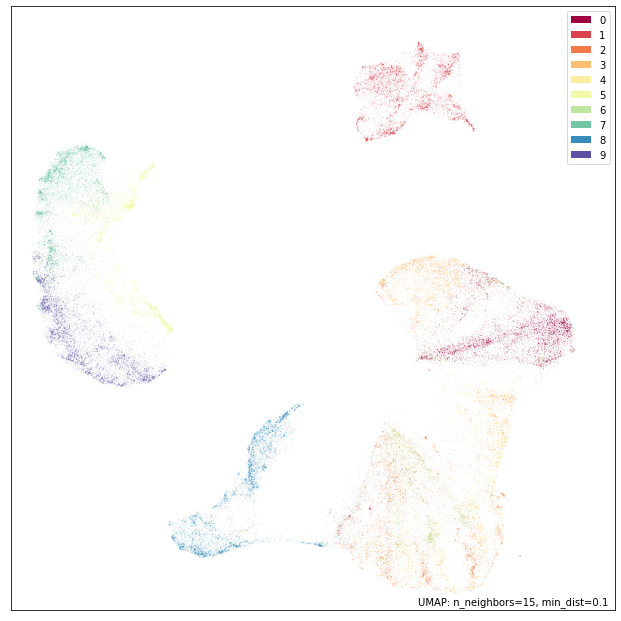

In [2]:
data, labels = sklearn.datasets.fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
mapper = umap.UMAP(random_state=42).fit(data)
umap.plot.points(mapper, labels=labels)

In [3]:
mapper.transform(data).shape

(70000, 2)

In [19]:
type(data)

pandas.core.frame.DataFrame

In [5]:
corners = np.array([
    [1, -5],  # bags
    [-2, 10],  # boots?
    [13, -5],  # shirts/tops/dresses
    [12, 14],  # pants
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

inv_transformed_points = mapper.inverse_transform(test_pts)


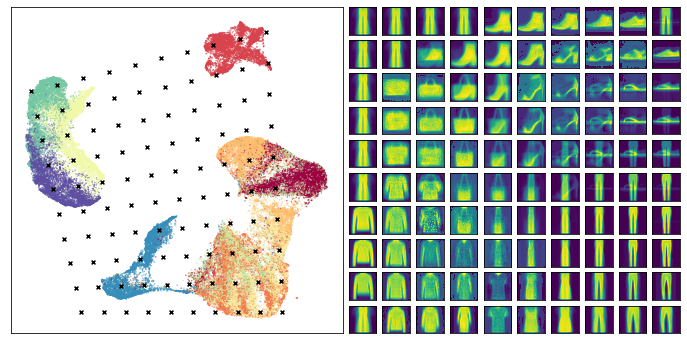

In [6]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
        digit_axes[i, j].set(xticks=[], yticks=[])

In [17]:
max(inv_transformed_points[0])

223.20917

In [18]:
inv_transformed_points

array([[ 0.0000000e+00,  4.7687036e-03,  9.6341074e-03, ...,
         2.0585479e-01,  2.1928044e-02,  0.0000000e+00],
       [ 0.0000000e+00,  4.5273476e-03,  9.1688829e-03, ...,
         1.9695222e-01,  2.1214208e-02,  0.0000000e+00],
       [ 0.0000000e+00,  4.2578876e-03,  8.6448779e-03, ...,
         1.8675329e-01,  2.0347118e-02,  0.0000000e+00],
       ...,
       [-2.5970170e-10, -5.2419789e-08, -1.7327535e-07, ...,
        -4.1424241e-06, -1.6206200e-06, -7.6359505e-08],
       [-3.6105034e-01, -5.4733139e-01, -6.4217681e-01, ...,
        -9.0297771e-01, -8.7604660e-01, -5.4790884e-01],
       [-1.2787445e-01, -6.8251419e-01, -6.8383265e-01, ...,
        -1.2307147e+00, -9.8750836e-01, -6.7522323e-01]], dtype=float32)